In [1]:
import sys
print (sys.version)

3.5.0 (default, Oct 25 2015, 10:35:04) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.0 (clang-700.0.72)]


In [22]:
from scipy.special import iv as besseli_scipy
from mpmath import besseli as besseli_mpmath, log
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq
from functools import lru_cache

<IPython.core.display.Javascript object>


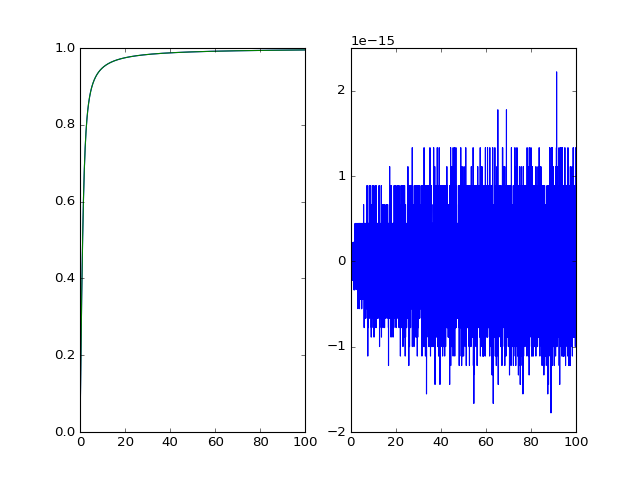

In [27]:
@lru_cache(maxsize=None)
def f_scsp(y):
    return besseli_scipy(1,y)/besseli_scipy(0,y)
def f_mpmath(y):
    return besseli_mpmath(1,y)/besseli_mpmath(0,y)
kappa = np.linspace(1e-6,100, 10000)
fig1 = plt.figure(1)
f_scsp_kappa = np.array([f_scsp(k) for k in kappa])
f_mpmath_kappa = np.array([f_mpmath(k) for k in kappa])
diff = [log(1+(f1-f2)) for f1, f2 in zip(f_scsp_kappa, f_mpmath_kappa)]
ax1 = fig1.add_subplot(121)
ax1.plot(kappa, f_scsp_kappa)
ax1.plot(kappa, f_mpmath_kappa)
ax2 = fig1.add_subplot(122)
ax2.plot(kappa, diff)

In [5]:
def par_optim(a):
    f_scsp_inv = lambda kappa: f_scsp(kappa) - a
    k = brentq(f_scsp_inv,1e-6, 713.5, maxiter=100000)
    return k

def approximation_Amos(A):
    """
    Amos, D.E., 1974. Computation of modified Bessel function and their ratios. Math. Comp., 28: 239-242.
    """
    k = A*(0.5+np.sqrt(1.46*(1-A*A)+0.25))/(1-A*A)
    return k

def approximation_Dobson(A):
    """
    Approximation for k given by Dobson (1978)
    """
    k = (1.28 - 0.53*A*A) * np.tan(np.pi/2*A)
    return k


def approximation_Hussin(A):
    """
    Approximation for k given by Hussin and Mohamed (2008)
    """
    p = (3*(A-1)-2)/(24*((A-1.)**2))
    q = (4-9*(A-1)+54*((A-1)**2))/(432*((A-1.)**3))
    sqrtD = np.sqrt((p/3.)**3+(q/2.)**2)
    k = ((-q/2)+sqrtD)**(1./3.)+(-(q/2.)-sqrtD)**(1./3.)-1/(6*(A-1.))
    return k

<IPython.core.display.Javascript object>


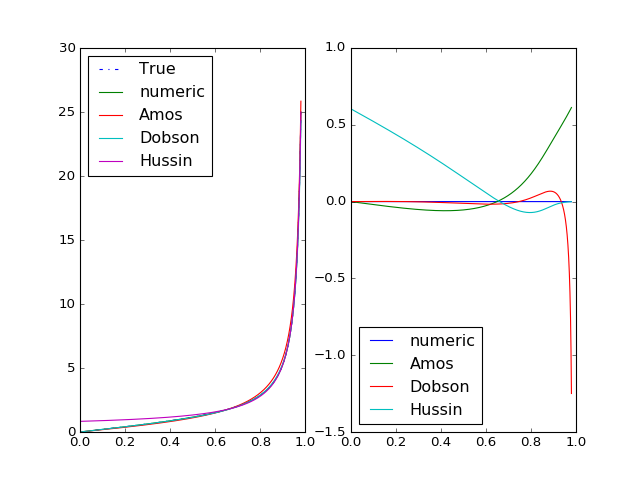

In [29]:
kappa = np.linspace(1e-6,25, 10000)
A = np.array([f_scsp(k) for k in kappa])
Ainv = []
for a in A:
    Ainv.append(par_optim(a))
    
fig2 = plt.figure(2)
ax1 = fig2.add_subplot(121)
ax1.plot(A, kappa,'-.')
ax1.plot(A, Ainv)
ax1.plot(A, approximation_Amos(A))
ax1.plot(A, approximation_Dobson(A))
ax1.plot(A, approximation_Hussin(A))
ax1.legend(['True', 'numeric', 'Amos', 'Dobson', 'Hussin'], loc='upper left')
ax2 = fig2.add_subplot(122)
ax2.plot(A, np.log(1+(Ainv-kappa)))
ax2.plot(A, np.log(1+(approximation_Amos(A)-kappa)))
ax2.plot(A, np.log(1+(approximation_Dobson(A)-kappa)))
ax2.plot(A, np.log(1+(approximation_Hussin(A)-kappa)))
ax2.legend(['numeric','Amos', 'Dobson', 'Hussin'], loc='lower left')

In [30]:
def mse(kappa_est):
    return np.mean((kappa_est-kappa)**2)
def mre(kappa_est):
    return np.max(np.abs(kappa_est-kappa) / kappa_est)
    
mse_numeric, mre_numeric = mse(Ainv), mre(Ainv) 
mse_Amos, mre_Amos = mse(approximation_Amos(A)), mre(approximation_Amos(A))
mse_Dobson, mre_Dobson = mse(approximation_Dobson(A)), mre(approximation_Dobson(A)) 
mse_Hussin, mre_Hussin = mse(approximation_Amos(A)), mre(approximation_Hussin(A)) 
print (mse_numeric, mse_Amos, mse_Dobson, mse_Hussin)
print (mre_numeric, mre_Amos, mre_Dobson, mre_Hussin)

9.78809210241e-26 0.464249562788 0.111700350004 0.464249562788
6.57627116357e-11 0.106396826113 0.0293693926053 0.999998797019


In [ ]:
%timeit for a in A: par_optim(a)
%timeit for a in A: approximation_Amos(a)
%timeit approximation_Amos(A)
%timeit for a in A: approximation_Dobson(a)
%timeit approximation_Dobson(A)   
%timeit for a in A: approximation_Hussin(a)
%timeit approximation_Hussin(A)

In [14]:
# Appendix 2.4 Mardia
for x in np.arange(0.01,1,0.01):
    print (x, par_optim(x))

0.01 0.020001000083341207
0.02 0.040008002667310166
0.03 0.060027020267329395
0.04 0.08006408546325047
0.05 0.10012526103690687
0.06 0.12021665022419603
0.07 0.14034440713527022
0.08 0.16051474737645802
0.09 0.1807339589255782
0.1 0.2010084133022418
0.11 0.221344577087028
0.12 0.24174902382941985
0.13 0.2622284464165263
0.14 0.28278966994288884
0.15 0.3034396651534119
0.16 0.32418556252155245
0.17 0.34503466703688906
0.18 0.3659944737753584
0.19 0.38707268433991177
0.2 0.4082772242603616
0.21 0.42961626145283255
0.22 0.4510982258469886
0.23 0.4727318303028128
0.24 0.494526092944581
0.25 0.5164903610610365
0.26 0.5386343367295586
0.27 0.5609681043426024
0.28 0.5835021602332298
0.29 0.6062474446186193
0.3 0.6292153761056902
0.31 0.6524178890310931
0.32 0.6758674739404016
0.33 0.6995772215480746
0.34 0.7235608705615586
0.35 0.7478328598038776
0.36 0.77240838511401
0.37 0.797303461588933
0.38 0.8225349917752792
0.39 0.8481208405327325
0.4 0.8740799173621039
0.41 0.9004322671217034
0.42 0.9